In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imdb = pd.read_table('./sentiment labelled sentences/imdb_labelled.txt', 
                     header=None, quoting=3)

imdb.columns = ['review', 'sentiment']
imdb['negative'] = (imdb['sentiment'] == 0)
imdb['positive'] = (imdb['sentiment'] == 1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


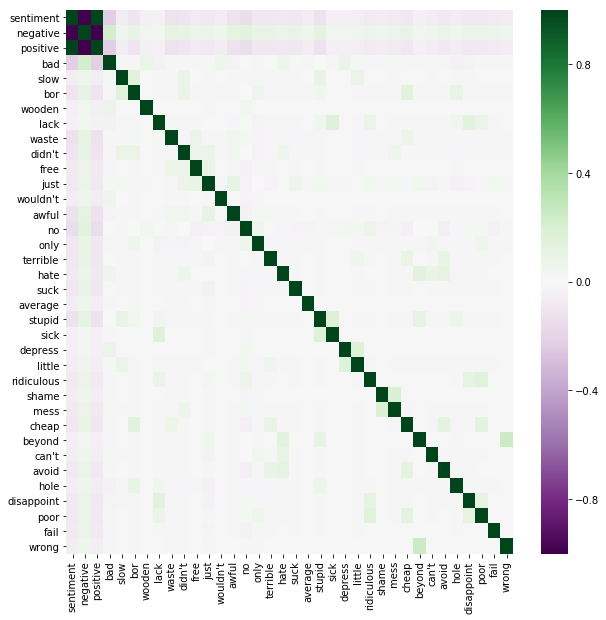

In [4]:
imdb = pd.read_table('./sentiment labelled sentences/imdb_labelled.txt', header=None, quoting=3)
imdb.columns = ['review', 'sentiment']
imdb['negative'] = (imdb['sentiment'] == 0)
imdb['positive'] = (imdb['sentiment'] == 1)

## Guess keywords (features) which might turn up in bad reviews

keywords_bad = ['bad', 'slow', 'bor', 'wooden', 'lack', 
                'waste', "didn't", 'free', 'just', "wouldn't", 
                'awful', 'no', 'only', 'terrible',
                'hate', 'suck', 'average', 'stupid',
                'sick', 'depress', 'little', 'ridiculous', 'shame',
                ' mess', 'cheap', 'beyond', "can't", 'avoid', 'hole',
                'disappoint', 'poor', 'fail', 'wrong']

for key in keywords_bad:
    imdb[str(key)] = imdb.review.str.contains(
        str(key), 
        case=False
    )

plt.figure(figsize=(10, 10))
sns.heatmap(imdb.corr(), cmap='PRGn')
plt.show()

In [6]:
data_bad = imdb[keywords_bad]
target_bad = imdb['negative']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data_bad, target_bad)

y_pred = bnb.predict(data_bad)

print("Number of mislabeled points out of a total {} points : {}".format(
    data_bad.shape[0],
    (target_bad != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 255


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


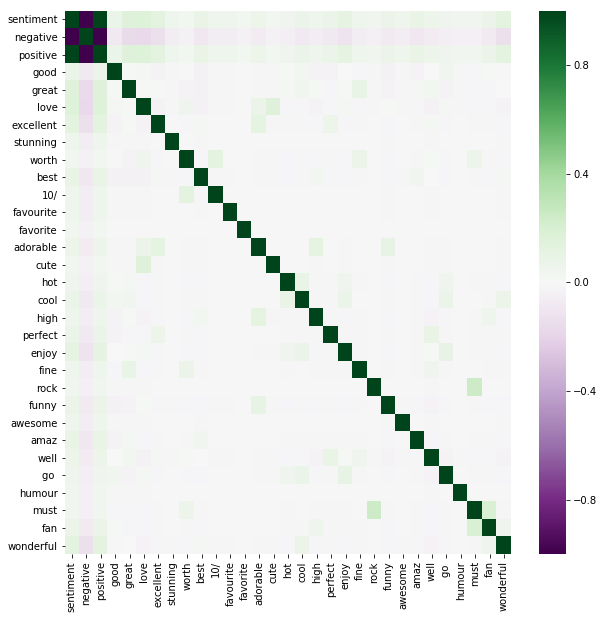

In [8]:
## Try another version looking at positive keywords

imdb_good = pd.read_table('./sentiment labelled sentences/imdb_labelled.txt', header=None, quoting=3)
imdb_good.columns = ['review', 'sentiment']
imdb_good['negative'] = (imdb_good['sentiment'] == 0)
imdb_good['positive'] = (imdb_good['sentiment'] == 1)

keywords_good = ['good', 'great', 'love', 'excellent', 'stunning', 
                'worth', 'best', '10/', "favourite", 
                'favorite', 'adorable', 'cute', 'hot', 'cool', 'high',
                'perfect', 'enjoy', 'fine', 'rock', 'funny', 'awesome',
                'amaz', 'well', 'go ', 'humour', 'must', 'fan', 'wonderful']

for key in keywords_good:
    imdb_good[str(key)] = imdb_good.review.str.contains(
        str(key), 
        case=False
    )

plt.figure(figsize=(10,10))
sns.heatmap(imdb_good.corr(), cmap='PRGn')
plt.show()


In [9]:
data_good = imdb_good[keywords_good]
target_good = imdb_good['positive']


bnb_good = BernoulliNB()

bnb_good.fit(data_good, target_good)

y_pred_good = bnb_good.predict(data_good)

print("Number of mislabeled points out of a total {} points : {}".format(
    data_good.shape[0],
    (target_good != y_pred_good).sum()
))

Number of mislabeled points out of a total 1000 points : 292


In [10]:
## Negative sentiment appears to be better. Test on Amazon.

In [11]:
amazon = pd.read_table('./sentiment labelled sentences/amazon_cells_labelled.txt', header=None, quoting=3)
amazon.columns = ['review', 'sentiment']
amazon['negative'] = amazon['sentiment'] == 0
amazon['positive'] = amazon['sentiment'] == 1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [12]:
for key in keywords_bad:
    amazon[str(key)] = amazon.review.str.contains(
        str(key), 
        case=False
    )

amazon_data_bad = amazon[keywords_bad]

amazon_y_pred = bnb.predict(amazon_data_bad)

print("Number of mislabeled points out of a total {} points : {}".format(
    data_bad.shape[0],
    (amazon.negative != amazon_y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 308


In [13]:
## Not bad given some words are movie specific!

In [14]:
amazon['positive'] = amazon['sentiment'] == 1

for key in keywords_good:
    amazon[str(key)] = amazon.review.str.contains(
        str(key),
        case=False
    )
    
amazon_data_good = amazon[keywords_good]

amazon_y_pred_good = bnb_good.predict(amazon_data_good)

print("Number of mislabeled points out of a total {} points: {}".format(
    amazon_data_good.shape[0],
    (amazon.positive != amazon_y_pred_good).sum()
))

Number of mislabeled points out of a total 1000 points: 251


In [15]:
## Positive sentiment model actually does better on Amazon!